In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
map_color_status = {'Activo':'green','No se accedió':'orange','No es ecopunto':'red','Removidos':'grey'}
map_color_acc = {'Accesible':'green','Medio':'orange','No accesible':'red'}

In [25]:
def dibjuar_mapa(df_draw: pd.DataFrame, col_attr: str, attr: bool, map_color: dict):
  """Identificar localización de eco puntos en la ciudad de Neuquén acompañado de otro atributo 'col_attr'
  al que se lo enmascara con un mapa de color.
  """
  # Localizar en Neuquén Capital
  mapa = folium.Map(location=[-38.951678, -68.059189], zoom_start=13)

  # Localizar ecopuntos
  for index, row in df_draw.iterrows():
      folium.Marker([row['lat'], row['lon']], popup=row['Ecopunto']).add_to(mapa)

  if attr:
    # Agregamos etiquetas a las coordenadas dado el valor de cada variable de interés
    for index, row in df_draw.iterrows():
        folium.Circle(
            location=[row['lat'], row['lon']],
            radius=136,
            popup=row[col_attr],
            fill=True,
            fill_opacity=0.7,
            color=map_color[row[col_attr]]
        ).add_to(mapa)

  if not col_attr:
    # Se dibuja un círculo azul que representa a una distancia determinada
    # tomando al ecopunto como centro
    for index, row in df_draw.iterrows():
        folium.Circle(
            location=[row['lat'], row['lon']],
            radius=500,
            popup='500m',
            fill=True,
            fill_opacity=0.3,
            color='blue'
        ).add_to(mapa)


  # Agregamos una capa de control al mapa
  folium.LayerControl().add_to(mapa)

  return mapa

def dibujar_torta(df_data: pd.DataFrame, col_attr: str):
  data = df_data[col_attr].value_counts().values
  labels = df_data[col_attr].value_counts(normalize=True).index
  colors = sns.color_palette('Set2')

  plt.pie(data, labels=labels,colors = colors, autopct = lambda p: '{:.0f}'.format((p/100)*data.sum()) )
  plt.title(col_attr)
  plt.show()

In [ ]:
def dibjuar_mapa_con_dist(df_draw: pd.DataFrame, col_target: str, circle: bool):
  """Dibujar un mapa para identificar localización de ciertos puntos
  y dibujar sobre ellos otros objetos"""

  # Localizar en Neuquén Capital
  mapa = folium.Map(location=[-38.951678, -68.059189], zoom_start=13)
  # Agregamos los puntos de las localidades
  for index, row in df_draw.iterrows():
      folium.Marker([row['lat'], row['lon']], popup=row['Ecopunto']).add_to(mapa)

  if circle:
    # Agregamos elementos dado el valor de cada variable de interés
    for i, col in enumerate(list(df_draw[col_target].unique())):
      for index, row in df_draw.loc[df_draw[col_target]==col].iterrows():
          folium.Circle(
              location=[row['lat'], row['lon']],
              radius=500,
              popup='500m', # para que aparezca como detalle al hacer click en alguna de las burbujas
              fill=True,
              fill_opacity=0.3,
              color='blue'
          ).add_to(mapa)


  # Agregamos una capa de control al mapa
  folium.LayerControl().add_to(mapa)

  return mapa

# Análisis

Fecha de relevamiento 1ra recorrida: marzo 2023  
Fecha de relevamiento 2da recorrida: 29/09/2023 - 11/10/2023

Durante el año 2023 se recorrieron las ecopuntos de la ciudad de Neuquén con el fin de evaluar el estado y uso por parte de los ciudadanos. Durante los recorridos, observamos que la mayoría de ellos se llenaban sólo con material plástico, por ejemplo botellas. Eran en mayor parte utilizados por personas encargadas del lugar dentro del cual se encontraban los ecopuntos.

En total se recorrieron más de 30 ecopuntos, de los cuáles sólo 22 se encontraron marcados en el mapa de ecopuntos que proporciona la subsecretaría de ambiente en octubre de 2023.

In [4]:
df = pd.read_csv('drive/MyDrive/AnalisisDeDatos/df_cleanedv2.csv')
# print('Total de ecopuntos relevados: ', df.shape[0])

In [5]:
# DICT_OLD_ECO = {'Ecopunto':['Econewenken','PaseDeLaCosta','Reaccionar'],
#                'lon': [-68.1058529, -68.053608, -68.0678225],
#                'lat': [-38.9482789, -38.979381, -38.9719614],
#                 'Estado actual':'Removidos'}

DICT_OLD_ECO = {'Ecopunto':['PaseDeLaCosta','Reaccionar'],
               'lon': [-68.053608, -68.0678225],
               'lat': [-38.979381, -38.9719614],
                'Estado actual':'Removidos'}

In [6]:
df_complete = pd.concat([df,pd.DataFrame(DICT_OLD_ECO)], axis=0)

# Estado actual de los ecopuntos

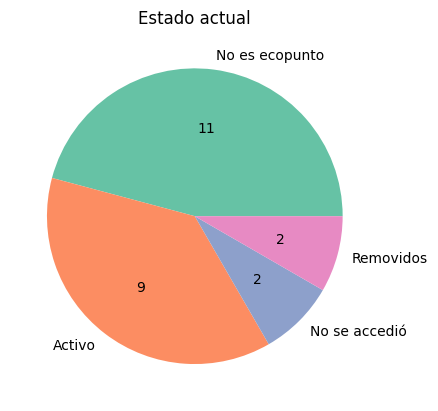

In [28]:
dibujar_torta(df_complete, 'Estado actual')

In [30]:
dibjuar_mapa(df_complete, 'Estado actual', attr=True, map_color=map_color_status)

En el mapa se puede apreciar en verde aquellos puntos que luego del segundo recorrido consideramos se encontraban activos, en naranja los que no se pudieron acceder para confirmar que existía un ecopunto, en rojo los que durante el recorrido se nos confirmó que el ecopunto ya no se encuentra activo, y en gris aquellos ecopuntos que durante el primer recorrido se encontraban en buen estado y eran utilizados, pero que al hacer el segundo recorrido fueron removidos del mapa que proporcionaba la subsecretaría de ambiente. Si bien el CPEM 47 se encontraba en el mapa en octubre de 2023, se relevó que el que estaba en funcionamiento es el de Econenken que está al lado de la escuela, por lo que todos los datos del ecopunto CPEM 47 en realidad corresponde al ecopunto de Econewenken. Por su parte, el Paseo de La Costa ya no se encontraba en el mapa pero en los dos recorridos se encontró en buenas condiciones para ser utilizado. Por último, el ecopunto de Reaccionar ubicado en la calle Leguizamón al 1500 se encontraba totalmente en uso pero desbordado, hecho que pudo causar el cierre del mismo.

Así, la mayor parte de los ecopuntos que se encontraban activos se localizan en la zona norte de la ciudad de Neuquén.

De los que no se accedieron, el tribunal de faltas se encontraba cerrado a la hora que fuimos (entre las 17 y 18 horas) al igual que la Comisión vecinal Barrio Huiliches. En ningún caso se pudo encontrar un ecopunto visible.

# Accesibilidad

In [7]:
df_acc = df.loc[df['Estado actual']=='Activo']

In [ ]:
# df_acc.shape

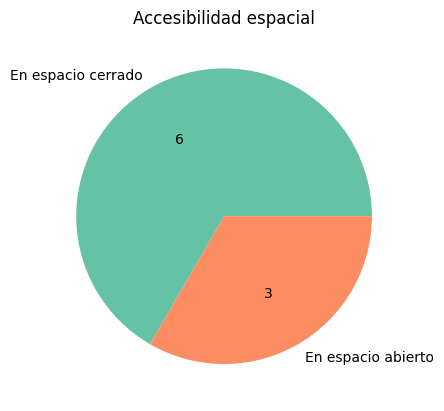

In [31]:
dibujar_torta(df_acc, 'Accesibilidad espacial')

De los 9 ecopuntos que se encontraban activos, seis se encontraba en un espacio cerrado, es decir, había algún elemento de por medio que impedía el libre acceso, ya sea porque se encontraban dentro de algún edificio o porque estaban cercados por alguna estructura.

El ecopunto de ALTO COMAHUE SHOPPING fue el caso más extremo que se encontró. Se encontraba ubicado en el subsuelo a un lado del estacionamiento, por detrás de una pared, por lo que no se podía acceder directamente desde la vía pública. Se tuvo que preguntar al menos a dos guardias de seguridad para saber dónde se ubicaba el ecopunto.

Para el resto de los ecopuntos, la mayoría eran utilizados por personas encargadas del lugar que los encerraban. Además, la disponibilidad del ecopunto dependía del horario en el que se encontraban abiertos estos lugares.

Algunos ejemplos son: el club sapere, fuzion paddle, comisión vecinal Barrio 14 de octubre, y la delegación municipal progreso.


In [ ]:
df_espacio = df_acc.loc[df_acc['Accesibilidad espacial']=='En espacio cerrado']
df_espacio['Accesibilidad Temporal Norm'] = np.where(df_espacio['Accesibilidad temporal'].isin(['Días hábiles','Siempre','No hay indicaciones de horario',
                                                                                                'Cuando está abierto']),df_espacio['Accesibilidad temporal'],
                                                                                                'Otro')

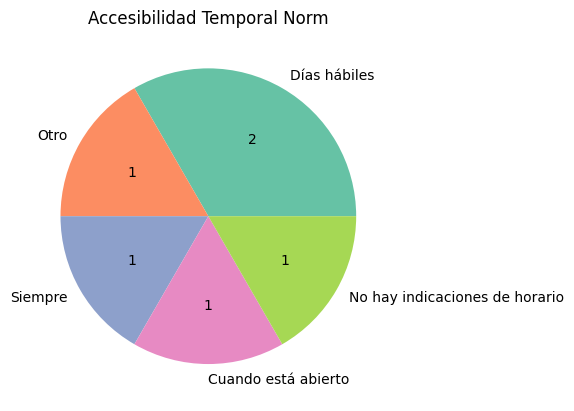

In [33]:
dibujar_torta(df_espacio, 'Accesibilidad Temporal Norm')

Es importante analizar la accesibilidad temporal ya que muchos ecopuntos se encontraban disponibles en horario laboral, donde la mayoría de los ciudadanos se encuentran en el trabajo, la escuela, o realizando otras actividades. ¿Por qué un ecopunto no puede estar disponible a toda hora del día?

# **Determinando la accesibilidad**

In [34]:
temp_in = ['Días hábiles']#,'Cuando está abierto', 'No hay indicaciones de horario','Siempre']

In [35]:
df_acc = df_acc.reset_index(drop=True)

In [36]:
cond = [(df_acc['Accesibilidad espacial']=='En espacio cerrado') & (df_acc['Accesibilidad temporal'].isin(temp_in)),
        (df_acc['Accesibilidad espacial']=='En espacio cerrado') & (df_acc['Accesibilidad temporal'] == 'Es espacio cerrado y con horarios. También es posible acceder a él arrojando los residuos en los caniles ya que la ubicación del alambrado lo permite '),
        df_acc['Accesibilidad espacial']=='En espacio abierto']
choice = ['No accesible','Medio','Accesible']
df_acc['Accesibilidad'] =  np.select(cond,choice,'Medio')


Si tomamos en cuenta los casos donde los ecopuntos se encuentran en espacio cerrado y hay horarios, y adicionamos el caso más extremo en cuanto a accesibilidad espacial, obtenemos el siguiente gráfico en cuanto a accesibilidad general de los ecopuntos que se encuentran activos y que se pudieorn acceder y visualizar.

Tomando como los casos más críticos de accesiblidad aquellos ecopuntos que no son accesibles por estar en un espacio cerrado y por tener el lugar horarios de ingreso, podemos visualizar en código de colores a:

Ecopuntos no accesibles: rojo  
Ecopuntos accesibles moderado: naranja  
Ecopuntos accesibles: verde

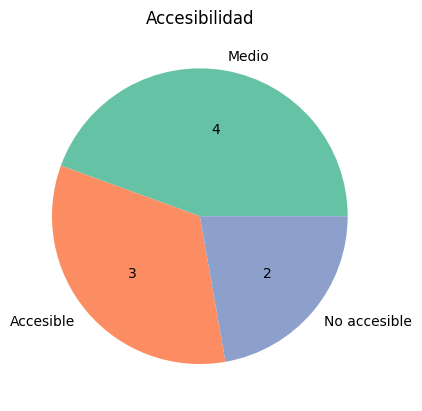

In [37]:
dibujar_torta(df_acc, 'Accesibilidad')

In [38]:
dibjuar_mapa(df_acc, 'Accesibilidad', attr=True, map_color=map_color_acc)

En el mapa podemos ver que de los ecopuntos activos, sólo tres son totalmente accesibles y se encuentran en la región nor-oeste de la ciudad.

Se entiende que también, según Cristian Haspert (evaluar si citarlo o no), una mayor disponibilidad de ecopuntos en la vía pública implica una mayor responsabilidad de cuidado de ellos, ya sea por parte del ciudadano como de la entidad responsable de la recolección de los residuos reciclables. El esparcimiento de los residuos causado por animales en la vía pública, o la no gestión del mismo con una frecuencia determinada pueden terminar ensuciando aún más la ciudad.

¿Queremos un sistema de reciclaje en el que la recolección de residuos sea accesible?
¿Estamos dispuestos a ser responsables?
¿Disponemos de un sistema que se encargue de la recolección eficiente?
¿A dónde se destinan estos residuos? ¿Qué es lo que se hace luego? ¿Vale la pena nuestro esfuerzo hoy en día?

# Estado de los ecopuntos

In [39]:
pd.set_option('display.max_columns',1000)

In [ ]:
# df_acc.shape

Sería qué tan bien cuidado se encontraban los ecopuntos

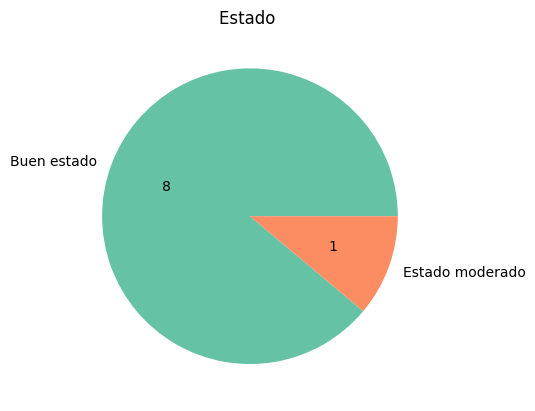

In [40]:
dibujar_torta(df_acc, 'Estado ')

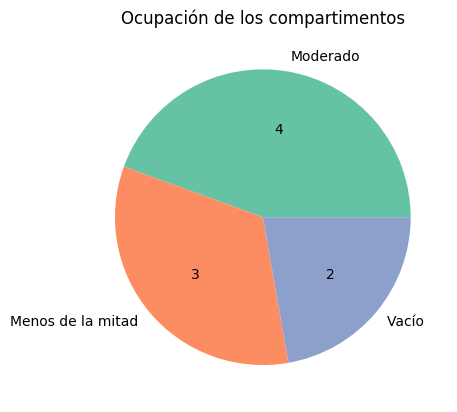

In [41]:
dibujar_torta(df_acc, 'Ocupación de los compartimentos')

En general los ecopuntos relevados se encontraban en buen estado y no estaban desbordados.   

Sin embargo, durante el recorrido se observó que no había señalización de dichos ecopuntos más que por encima de los mismos. Esto hace que, sobre todo para aquellos que se encuentran en espacios cerrados, sean cada vez más difíciles de acceder.

# Ubicación

En términos de ubicación de los ecopuntos analizamos la distancia que había entre cada uno de ellos y la cobertura territorial que los distinguían

In [10]:
dict_distance = {}
for index, point1 in df_acc.iterrows():
  for indexp, point2 in df_acc.iterrows():
    point1_row = point1[['Ecopunto','lat','lon']]
    point2_row = point2[['Ecopunto','lat','lon']]
    if point1_row['Ecopunto'] == point2_row['Ecopunto']:
      continue
    distance = np.sqrt((point1_row["lat"] - point2_row["lat"])**2 + (point1_row["lon"] - point2_row["lon"])**2)*100
    dict_distance[str(point1_row['Ecopunto']) + '_' + str(point2_row['Ecopunto'])] = distance


In [12]:
df_distance = pd.DataFrame(dict_distance, index=[0])
df_distance = df_distance.T
df_distance.columns = ['distance']

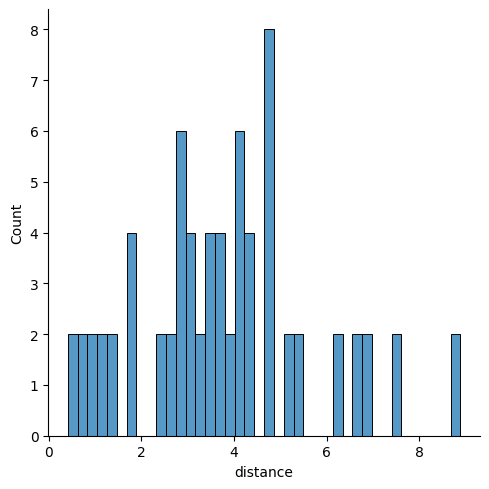

In [15]:
sns.displot(df_distance['distance'], bins=40)
plt.show()

El promedio de distancias entre cada uno de los ecopuntos que se encontraban activos es de 3.7 kilómetros

## Distribución de ecopuntos en la ciudad

Si establecemos que hasta 500 metros una persona podría acercarse al ecopunto caminando..

In [ ]:
map_ub_dist = dibjuar_mapa(df_acc, None, attr=False, map_color={})
folium.PolyLine([(-38.936416, -68.059058), (-38.979781, -68.059367)], color="red", weight=2.5, opacity=1).add_to(map_ub_dist)
folium.PolyLine([(-38.954645, -68.132429), (-38.955469, -68.017609)], color="blue", weight=2.5, opacity=1).add_to(map_ub_dist)

In [27]:
map_ub_dist

Se observa que en la zona nor oeste se encuentran más cerca uno de otros, solapando el radio de 500 metros que se dibuja desde cada uno de los ecopuntos. Mientras que en la zona este y sur sólo se encontraron 2 ecopuntos activos los cuales no cubren la totalidad de los barrios. Esto obliga a los ciudadanos a tener que moverse en automóvil.

Conclusión personal:
Durante los recorridos se pudo hablar con la gente que utilizaba el ecopunto, y en dos ocasiones notamos compromiso del ciudadano y ganas de contruibuir al sistema de reciclaje. Pero el sistema y la comunicación de la existencia de los ecopuntos no están en las mejores condiciones.

Una mayor comunicación, señalización y educación ambiental, podría hacer funcionar a los ecopuntos de una mejor forma.

In [43]:
%%shell
jupyter nbconvert --no-input --to html /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.ipynb to html
[NbConvertApp] Writing 866095 bytes to /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.html
